## Tarea 1 del curso CM-072

* Nombre y apellidos: Víctor Racsó Galván Oyola
* Fecha de presentación: 11 de setiembre.

## Lista de preguntas:

1 . Responde de acuerdo a los conceptos hechos en clase las siguientes preguntas:
   * Supongamos que tenemos la tarea de construir un sistema que pueda distinguir  correo no deseado o spam. ¿Qué crees que hay en un correo electrónico no deseado que nos permite saber que es spam? ¿Cómo puede la computadora detectar spam a través de un análisis sintáctico?. ¿Qué te gustaría que hiciera la computadora si detecta un correo electrónico que es spam?, ¿eliminarlo automáticamente, moverlo a un archivo diferente o simplemente resaltarlo en la pantalla?.
   
   * ¿Cómo se puede predecir el siguiente comando a ser escrito por un usuario? ¿O la próxima página de la que descargará información en la Web? ¿Cuándo sería útil tal predicción? ¿Cuándo no?.

- Primero, deberiamos guardar cada mensaje como un mapa de palabras con sus respectivas frecuencias tal que pasen una frecuencia minima llamada UMBRAL.
- Luego, en funcion a las palabras que esten presentes con mas frecuencia es probable que un spam se distinga de un correo normal ("bueno/a", "noticia", etc están en spam).
- La computadora podría separar el spam en función a la forma de referirse al receptor basandonos en que lo usual es que en un spam se use 3ra persona, mientras que un correo dirigido suele ser en 2da (aunque en aspectos laborarales se deberia obviar esta situación).
- Si la computadora detectara un spam lo ideal sería que se nos notifique para luego eliminarlo, puesto que segun la frecuencia con la que el mismo usuario nos envie spam podria ser necesario bloquear la fuente.
- El siguiente comando a ser escrito por un usuario puede ser predecido en funcion a los comandos anteriores que ha colocado, además de que con todas las veces anteriores se puede obtener el limite de conocimiento de comandos que domina el usuario, lo que da una mayor probabilidad de que use un comando que ya sabe considerando la situacion actual del sistema.
- La prediccion seria util si es que lo que debemos analizar es poco volátil, por ejemplo, el tema de predecir un comando puede variar de manera inesperada muchas veces de manera independiente, por lo que no es válido admitir que se logrará una precisión aceptable.

2 . ¿Puedes predecir las especies de un iris usando medidas de pétalos y sépalos?

   * Lee los datos del conjunto predeterminado `iris` en un DataFrame de Pandas, incluyendo los nombres de las columnas.
   * Recolecta  información básica sobre los datos `iris`  utilizando pandas.
   * Utiliza la clasificación, [dividir-aplicar-combinar](https://pandas.pydata.org/pandas-docs/version/0.23.4/groupby.html) y  visualización para buscar las diferencias entre las especies.

   * Escribe un conjunto de reglas que podrían usarse para predecir especies en base a las mediciones de iris.
   * Define una función que acepte una fila de datos y devuelva una especie pronosticada. Luego, usa esa función para hacer predicciones para todas las filas de datos existentes y verifique la precisión de sus predicciones.


In [13]:
# Importamos pandas y la raw data
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' # Direccion de los datos
col_names = ['l_sepalo', 'w_sepalo', 'l_petalo', 'w_petalo', 'especie'] # Ponemos nombre a las columnas
iris = pd.read_csv(url, header=None, names=col_names) # Creamos el DataFrame
iris.head(10)

,l_sepalo,w_sepalo,l_petalo,w_petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


3 . Sea el siguiente código de generación de datos:

In [18]:
# Preprocesamiento
X = iris.drop('especie',axis=1) # Argumentos para clasificación
print("X")
print(X.head(10))
print("Y")
y = iris['especie']
print(y.head(10)) # Valores correctos de clasificación

X
   l_sepalo  w_sepalo  l_petalo  w_petalo
0       5.1       3.5       1.4       0.2
1       4.9       3.0       1.4       0.2
2       4.7       3.2       1.3       0.2
3       4.6       3.1       1.5       0.2
4       5.0       3.6       1.4       0.2
5       5.4       3.9       1.7       0.4
6       4.6       3.4       1.4       0.3
7       5.0       3.4       1.5       0.2
8       4.4       2.9       1.4       0.2
9       4.9       3.1       1.5       0.1
Y
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: especie, dtype: object


In [102]:
# Recolección de datos
# Especies
Especies = ['Iris-setosa','Iris-versicolor','Iris-virginica']
# Maximo y Minimo
Minimo_por_especie_l_petalo = iris[['l_petalo','especie']].groupby(['especie']).min() # Agrupamos por especie - Minimo
print(Minimo_por_especie_l_petalo)
Maximo_por_especie_l_petalo = iris[['l_petalo','especie']].groupby(['especie']).max() # Agrupamos por especie - Maximo
print(Maximo_por_especie_l_petalo)
Minimo_por_especie_w_petalo = iris[['w_petalo','especie']].groupby(['especie']).min()
print(Minimo_por_especie_w_petalo)
Maximo_por_especie_w_petalo = iris[['w_petalo','especie']].groupby(['especie']).max()
print(Maximo_por_especie_w_petalo)
# Media agrupada por especie y l_petalo
Media_por_especie_y_l_petalo_l_sepalo = iris[['l_petalo','especie','l_sepalo']].groupby(['especie','l_petalo']).mean()

                 l_petalo
especie                  
Iris-setosa           1.0
Iris-versicolor       3.0
Iris-virginica        4.5
                 l_petalo
especie                  
Iris-setosa           1.9
Iris-versicolor       5.1
Iris-virginica        6.9
                 w_petalo
especie                  
Iris-setosa           0.1
Iris-versicolor       1.0
Iris-virginica        1.4
                 w_petalo
especie                  
Iris-setosa           0.6
Iris-versicolor       1.8
Iris-virginica        2.5


In [117]:
def inside(E,row): # Clasificamos si pertenece o no a los intervalos de l_petalo y w_petalo
    if Minimo_por_especie_l_petalo.at[E,'l_petalo'] <= row['l_petalo'] <= Maximo_por_especie_l_petalo.at[E,'l_petalo']:
        if Minimo_por_especie_w_petalo.at[E,'w_petalo'] <= row['w_petalo'] <= Maximo_por_especie_w_petalo.at[E,'w_petalo']:
            return True
        else: return False
    else: return False

def easyClassify(row): # Funcion de clasificacion por fila
    for E in Especies: # Verificamos para todas las especies si puede pertenecer o no
        if inside(E,row):
            return E
    return 'Ninguno'
    
results = X.apply(easyClassify,axis=1) # Aplicamos a todo el DataFrame la funcion de clasificacion
print("Accepted: ",sum(results==y),"- Rejected: ",sum(results!=y)) # Imprimimos los resultados

Accepted:  142 - Rejected:  8


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

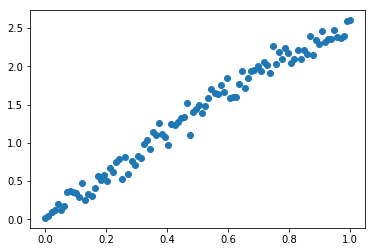

In [4]:
# Recolectamos datos artificiales
n = 100
x = np.linspace(0, 1, n)
y = np.sin(x)*3 + np.random.normal(0, 0.1, n)
plt.plot(x, y, 'o');

Usando los siguientes datos y scikit learn, desarrolla los siguientes pasos descritos en clase, para una regresión lineal:

* Escoger un modelo
* Elegir modelo de hiperparámetros
* Organiza los datos en una matriz de características y vector objetivo.
* Fija el modelo a tus datos.
* Predecir etiquetas para datos desconocidos.

In [9]:
from sklearn.linear_model import LinearRegression
Regresion = LinearRegression(normalize=True, n_jobs=10) # Usamos regresión lineal
Regresion

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=True)

In [10]:
Xs = x[:, np.newaxis] # Generamos datos con una dimensión mas
Regresion.fit(Xs, y) # Ajustamos la curva en base a los resultados esperados

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=True)

In [11]:
Y_predecido = Regresion.predict(Xs) # Predecimos en funcion al ajuste anterior

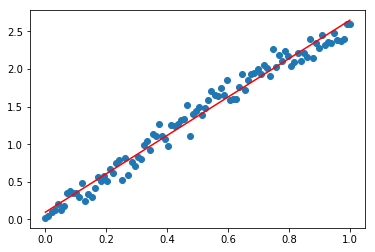

In [12]:
plt.plot(x, y, 'o', x, Y_predecido, '-r'); # Mostramos la curva generada

4 . Realiza los mismos pasos para el conjunto  de datos de scikit learn  [load_diabetes](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). 

In [5]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [6]:
data.keys()

dict_keys(['target', 'data', 'feature_names', 'DESCR'])

In [7]:
print(data['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [9]:
import pandas as pd
x = pd.DataFrame(data['data'], columns=data['feature_names']) # Obtenemos los datos sin su resultado
y = data['target'] # Obtenemos los resultados esperados de cada fila
x.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [10]:
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbors classifier
neigh = KNeighborsClassifier(n_neighbors = 100) # Usamos K = 100
neigh.fit(x,y) # Ajustamos el predictor para los datos

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [19]:
v1 = np.random.uniform(-1.0,1.0,10)
v2 = np.random.binomial(1,0.1,10)
print(neigh.predict([v1,v2])) # Ejemplo de entrada cualquiera

[71. 84.]


5 (Obligatoria). Lee el siguiente artículo [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html), responde las siguientes preguntas:

* En el ejemplo Party Registration, ¿cuáles son las características? ¿Cuál es la respuesta? ¿Es  un problema de regresión o clasificación?.

* Conceptualmente, ¿cómo se aplica KNN a este problema para hacer una predicción?
* ¿Cómo se relacionan las cuatro visualizaciones en la sección 3 entre sí?. Cambia el valor de **k** utilizando el control deslizante y explica por que  cambió  las visualizaciones.
* En las figuras 4 y 5, ¿qué significan los colores más claros en comparación con los colores más oscuros? ¿Cómo se calcula la oscuridad?

* ¿Qué representa la línea negra en la figura 5? ¿Qué predicciones haría el mejor modelo de aprendizaje automático con respecto a esta línea?

* Elije un valor pequeño para `k` y haz clic en el botón `Generate New Training Data` varias veces. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?

* Repite este procedimiento con un valor muy grande de `k`. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?.

* Utiliza otros valores de `k`. ¿Qué valor crees que es "mejor"? ¿Cómo defines "mejor"?.

* ¿Un pequeño valor de `k` produce "overfitting" o "underfitting"? y ¿por qué?.

* ¿Por qué debería importarnos la varianza? ¿No deberíamos minimizar el sesgo e ignorar la varianza?.

- Las caracteristicas usadas en Party Registration son Religión y Poder económico, la respuesta es el voto de la persona. Es un problema de clasificación dado que el resultado se puede expresar como valores discretos en un rango determinado.
- El KNN se aplica al modelo siguiendo que existe un valor $k$ fijo y para cada punto $x$ se obtiene el promedio de los $k$ votantes más cercanos al punto $x$ (usando alguna métrica) y predecir su voto usándolo.
- Mientras se va subiendo el valor de $k$ los colores de las componentes se van volviendo más claros.
- Los colores más oscuros representan que la mayoria para esa region es intensa (implica que sus vecinos en su mayoria muestran una tendencia alta a votar como se predice), mientras que colores más claros representan que no hay predominio por parte de algun color entre los vecinos. La oscuridad es en función al promedio de los $k$ vecinos más cercanos.
- La linea negra representa una división aproximada que sirve para separar los votantes de manera directa. A través de los datos se nota un pequeño sesgo y una varianza mediana.
- Con un k más grande se puede ver una varianza pequeña pero un sesgo muy alto.
- Para k=30 hay sesgo y varianza ligeros.
- Un valor pequeño de $k$ produce overfitting, debido a que al usar pocos vecinos, la tendencia es que la región se pinte del color del training data set.
- La varianza es importante al momento de ingresar nuevos datos a la predicción. Con nuevos datos, el esquema de clasificación cambia y puede destruirse por completo si tratamos con nuevos datos volátiles. Minimizar el sesgo es importante, pero no importa minimizar el sesgo actual si al momento de tratar con datos nunca antes vistos no pueda realizar una predicción cercana a lo estándar.